In [1]:
pip install scikit-learn

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python3.9 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python3.9 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python3.9 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install mlxtend

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python3.9 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as ps
from mlxtend.preprocessing import MeanCenterer
import random
import math
import copy

In [6]:
#Load the data into pandas dataframe
X_og = ps.read_csv("accent-mfcc-data-1.data", header=None)
X_pd = X_og.copy()

target_labels = ["ES", "FR", "GE", "IT", "UK", "US"]

#Replace the target labels with numerical values

for i in range(len(X_pd)):
    if (X_pd.iloc[i,0] == "ES"):
        X_pd.iloc[i,0] = 0
    elif(X_pd.iloc[i,0] == "FR"):
        X_pd.iloc[i,0] = 1
    elif(X_pd.iloc[i,0] == "GE"):
        X_pd.iloc[i,0] = 2
    elif(X_pd.iloc[i,0] == "IT"):
        X_pd.iloc[i,0] = 3
    elif(X_pd.iloc[i,0] == "UK"):
        X_pd.iloc[i,0] = 4
    else:
        X_pd.iloc[i,0] = 5

#Retrieve targets and add into a numpy array

y_temp = X_pd.iloc[:,0]
y = y_temp.to_numpy()

#Retrieve data without the targets and add into a numpy array
without_labels = X_pd.drop(X_pd.columns[0], axis=1)
X = without_labels.to_numpy()




In [7]:
#Function to computte the PCA decomposition
def components(dataset, number):
    U,D,V = np.linalg.svd(dataset, full_matrices=False)
    return V[:number, :]

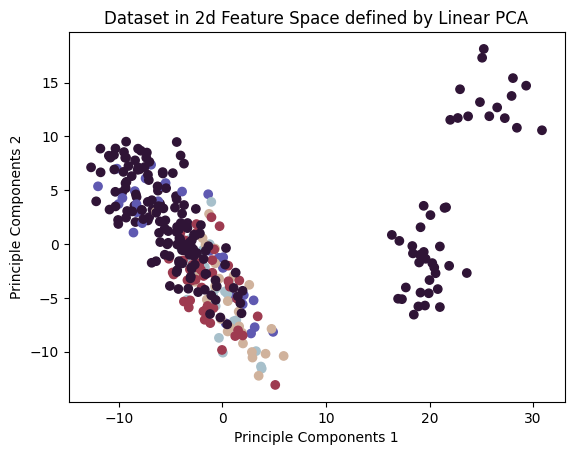

In [83]:
#Center the data

centered_X = X - X.mean(axis=0)

#Compute the new basis Z of the data using PCA to find the 
#top 2 principle components and multiplying that with the centered data

W = components(centered_X, 2)
Z = np.matmul(centered_X, W.T)

zrows, zcols = Z.shape

#Plot the datapoints in the new basis according to their class

"""for i in range(zrows):
    if (y[i] == 0):
        plt.scatter(Z[i][0], Z[i][1], color = 'blue')
    elif (y[i] == 1):
        plt.scatter(Z[i][0], Z[i][1], color = 'pink')
    elif (y[i] == 2):
        plt.scatter(Z[i][0], Z[i][1], color = 'green')
    elif (y[i] == 3):
        plt.scatter(Z[i][0], Z[i][1], color = 'black')
    elif (y[i] == 4):
        plt.scatter(Z[i][0], Z[i][1], color = 'purple')
    elif(y[i] == 5):
        plt.scatter(Z[i][0], Z[i][1], color = 'orange') 
plt.show()"""

plt.scatter(Z[:,0], Z[:,1], c=y, cmap='twilight_shifted')
plt.xlabel("Principle Components 1")
plt.ylabel("Principle Components 2")
plt.title("Dataset in 2d Feature Space defined by Linear PCA")
plt.show()


In [9]:
#Multiclass Perceptron

"""def perceptron(X, y):
    rows, cols = (6, X.shape[1]+1)
    w = [[0 for i in range(cols)] for j in range(rows)]
    for element in w:
        element[X.shape[1]] = 1
    
    #w = [[0,0,0,0,0,0,0,0,0,0,0,0,1],[0,0,0,0,0,0,0,0,0,0,0,0,1],[0,0,0,0,0,0,0,0,0,0,0,0,1],[0,0,0,0,0,0,0,0,0,0,0,0,1],[0,0,0,0,0,0,0,0,0,0,0,0,1],[0,0,0,0,0,0,0,0,0,0,0,0,1]]

    biasCol = np.ones((X.shape[0],1), dtype=int)
    newX = np.hstack((X, biasCol))

    for i in range(10):
        #errSum = 0
        picked = []
        pickedFlag = True
        for j in range(newX.shape[0]):
            pickedFlag = True
            while (pickedFlag == True):
                fV = random.choice(newX)
                pickedFlag = False
                for element in picked:
                    if (np.array_equal(element, fV)):
                        pickedFlag = True
                        break
            picked.append(fV)
            for k in range(newX.shape[0]):
                if (np.array_equal(newX[k,:],fV)):
                    index = k
                    break
        #for j in range(newX.shape[0]):
            #fV = newX[j, :]
            #index = j
            
            dict = {}
            #maxArr = []
        
            for k in range (len(w)):
                val = np.matmul(w[k],fV)
                dict[k] = val
                #if (k == 0):
                   # maxArr.append(0)
                    #maxArr.append(val)
                #else:
                    #if val > maxArr[1]:
                        #maxArr[0] = k
                        #maxArr[1] = val
            
            y_current = max(dict, key=dict.get)
            #y_current = maxArr[0]
            y_target = y[index]

            if (y_current != y_target):
                #errSum+=1
                w[y_current] = w[y_current] - fV
                w[y_target] = w[y_target] + fV
        #print('-----Training step ' + str(i+1) + ' finished with total no. of errors =  ' + str(errSum))

    errSum = 0
    picked2 = []
    pickedFlag2 = True
    for j in range(newX.shape[0]):
        pickedFlag2 = True
        while (pickedFlag2 == True):
            fV2 = random.choice(newX)
            pickedFlag2 = False
            for element in picked2:
                if (np.array_equal(element, fV2)):
                    pickedFlag2 = True
                    break
        picked2.append(fV2)
        for k in range(newX.shape[0]):
            if (np.array_equal(newX[k,:],fV2)):
                index = k
                break
    #for j in range(newX.shape[0]):
        #fV = newX[j, :]
        #index = j            
        dict = {}
            
        for k in range (len(w)):
            val = np.matmul(w[k],fV)
            dict[k] = val
                
        y_current = max(dict, key=dict.get)
        y_target = y[index]

        if (y_current != y_target):
            errSum+=1

    accuracy = math.floor(((329-errSum)/329)*100)
    return accuracy
    #return errSum"""


"def perceptron(X, y):\n    rows, cols = (6, X.shape[1]+1)\n    w = [[0 for i in range(cols)] for j in range(rows)]\n    for element in w:\n        element[X.shape[1]] = 1\n    \n    #w = [[0,0,0,0,0,0,0,0,0,0,0,0,1],[0,0,0,0,0,0,0,0,0,0,0,0,1],[0,0,0,0,0,0,0,0,0,0,0,0,1],[0,0,0,0,0,0,0,0,0,0,0,0,1],[0,0,0,0,0,0,0,0,0,0,0,0,1],[0,0,0,0,0,0,0,0,0,0,0,0,1]]\n\n    biasCol = np.ones((X.shape[0],1), dtype=int)\n    newX = np.hstack((X, biasCol))\n\n    for i in range(10):\n        #errSum = 0\n        picked = []\n        pickedFlag = True\n        for j in range(newX.shape[0]):\n            pickedFlag = True\n            while (pickedFlag == True):\n                fV = random.choice(newX)\n                pickedFlag = False\n                for element in picked:\n                    if (np.array_equal(element, fV)):\n                        pickedFlag = True\n                        break\n            picked.append(fV)\n            for k in range(newX.shape[0]):\n                if (np.

In [91]:
#Multiclass Perceptron

def perceptron(X, y):
    rows, cols = (6, X.shape[1]+1)
    w = [[0 for i in range(cols)] for j in range(rows)]
    for element in w:
        element[X.shape[1]] = 1
    
    #w = [[0,0,0,0,0,0,0,0,0,0,0,0,1],[0,0,0,0,0,0,0,0,0,0,0,0,1],[0,0,0,0,0,0,0,0,0,0,0,0,1],[0,0,0,0,0,0,0,0,0,0,0,0,1],[0,0,0,0,0,0,0,0,0,0,0,0,1],[0,0,0,0,0,0,0,0,0,0,0,0,1]]

    biasCol = np.ones((X.shape[0],1), dtype=int)
    newX = np.hstack((X, biasCol))

    for i in range(10):
        #errSum = 0
        fVIndices = np.arange(329)
        #shuffled = newX.copy()
        np.random.shuffle(fVIndices)
        #for fV in shuffled:
        for fVI in fVIndices:
            #for k in range(newX.shape[0]):
                #if (np.array_equal(newX[k,:],fV)):
                    #index = k
                    #break
            fV = newX[fVI]
            dict = {}
        
            for k in range (len(w)):
                val = np.matmul(w[k],fV)
                dict[k] = val
            
            y_current = max(dict, key=dict.get)
            #y_target = y[index]
            y_target = y[fVI]

            if (y_current != y_target):
                w[y_current] = w[y_current] - fV
                w[y_target] = w[y_target] + fV

    errSum = 0
    #shuffled = newX.copy()
    fVIndices = np.arange(329)
    #np.random.shuffle(shuffled)
    np.random.shuffle(fVIndices)
    #for fV2 in shuffled:
    for fVI2 in fVIndices:
        #for k in range(newX.shape[0]):
            #if (np.array_equal(newX[k,:],fV2)):
                #index = k
                #break
        dict = {}
        fV2 = newX[fVI2]
            
        for k in range (len(w)):
            val = np.matmul(w[k],fV2)
            dict[k] = val
                
        y_current = max(dict, key=dict.get)
        #y_target = y[index]
        y_target = y[fVI2]

        if (y_current != y_target):
            errSum+=1

    accuracy = math.floor(((329-errSum)/329)*100)
    #return errSum
    return accuracy

In [90]:
from sklearn.datasets import load_digits

CLASSES=10
digits = load_digits(n_class=CLASSES)
X_dig = digits.data
y_dig = digits.target

accuracyOG = perceptron(X_dig,y_dig)
print("Original Feature Space Accuracy: " + str(accuracyOG) + "%")

Original Feature Space Accuracy: 100%


In [92]:
accuracyOG = perceptron(X,y)
print("Original Feature Space Accuracy: " + str(accuracyOG) + "%")

centered_X = X - X.mean(axis=0)

for i in range(2, 13):
    W = components(centered_X,i)
    Z = np.matmul(centered_X, W.T)

    accuracy = perceptron(Z,y)
    print(str(i)+"d Feature Space Accuracy:" + str(accuracy) + "%")



Original Feature Space Accuracy: 55%
2d Feature Space Accuracy:44%
3d Feature Space Accuracy:51%
4d Feature Space Accuracy:46%
5d Feature Space Accuracy:54%
6d Feature Space Accuracy:53%
7d Feature Space Accuracy:54%
8d Feature Space Accuracy:63%
9d Feature Space Accuracy:56%
10d Feature Space Accuracy:67%
11d Feature Space Accuracy:68%
12d Feature Space Accuracy:72%


In [12]:
row, cols = centered_X.shape
vals = []

for i in range(cols):
    var = np.var(centered_X[:, i])
    vals.append(var)
                
maxVar = max(vals)
minVar = min(vals)
    

In [31]:
gammas = [0.02,0.03,0.04,0.05,0.06,0.07,0.08]
errorMatrix = np.full((330,7), 0)
A = np.full((row,row), 1/row)
for g in range (len(gammas)):
    K = np.zeros((row, row))
    for i in range(row):
        for j in range(row):
            dist = np.linalg.norm(centered_X[i,:]-centered_X[j,:])
            distsqrd = pow(dist,2)
            val = math.exp(-(gammas[g]*distsqrd))
            K[i][j] = val

    norK = K - (np.matmul(A,K)) - (np.matmul(K,A)) + np.matmul(np.matmul(A,K),A)
    for p in range(2, 330):
        V = components(norK, p)
        Z = np.matmul(norK, V.T)
        error = perceptron(Z,y)
        #error = 5
        #print(error)
        errorMatrix[p][g] = error
        



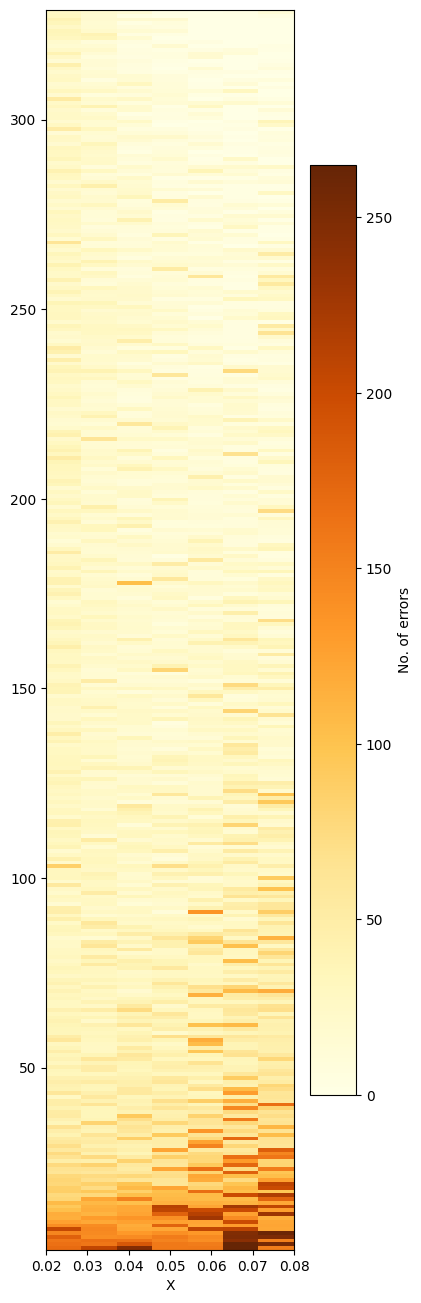

In [101]:
#plt.imshow(errorMatrix, aspect='auto')
#plt.imshow(errorMatrix, aspect='auto', extent=[0.02,0.08,329,0])
colormap = plt.cm.get_cmap('YlOrBr')
plt.matshow(errorMatrix[2:], interpolation='none', aspect='auto', extent=[0.02,0.08,329,2], cmap=colormap)
plt.gca().xaxis.tick_bottom()
plt.xlabel("X")
plt.gca().invert_yaxis()
cbar = plt.colorbar()
cbar.set_label('No. of errors')
plt.show()

In [64]:
for i in range(2,errorMatrix.shape[0]):
    if (0 in errorMatrix[i,:]):
        print(i)

267
281
289
290
291
297
298
299
301
302
303
304
306
307
308
310
312
314
315
316
317
318
320
321
322
323
324
325
326
327
328
329
